In [ ]:
from google.colab import files
uploaded= files.upload()

Saving epa-sea-level - Copy.csv to epa-sea-level - Copy.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import io
#Use Pandas to import the data from epa-sea-level.csv.
df=pd.read_csv(io.BytesIO(uploaded['epa-sea-level.csv']))

In [ ]:
df.head(15)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880.0,0.000000,-0.952756,0.952756,NaN
1,1881.0,0.220472,-0.732283,1.173228,NaN
2,1882.0,-0.440945,-1.346457,0.464567,NaN
3,1883.0,-0.232283,-1.129921,0.665354,NaN
4,1884.0,NaN,-0.283465,1.464567,NaN
5,1885.0,0.531496,-0.330709,1.393701,NaN
6,1886.0,0.437008,-0.381890,1.255906,NaN
7,1887.0,0.216535,-0.602362,1.035433,NaN
8,1888.0,0.299213,-0.519685,1.118110,NaN
9,1889.0,0.362205,-0.456693,1.181102,NaN


In [ ]:
df.shape

(134, 5)

In [ ]:
df.dtypes

Year                        float64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
NOAA Adjusted Sea Level     float64
dtype: object

# Preprocessing / Cleaning

Text(0, 0.5, 'Sea Level (inches)')

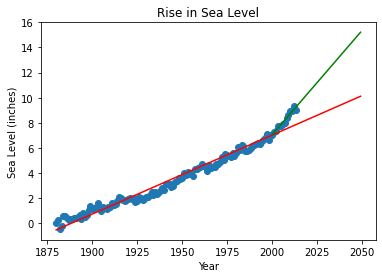

In [ ]:
#Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. 
#Plot the line of best fit over the top of the scatter plot. 
#Make the line go through the year 2050 to predict the sea level rise in 2050.

fig,a=plt.subplots()
x=df['Year']
y=df['CSIRO Adjusted Sea Level']
plt.scatter(x,y)
res=linregress(x,y)
x_pred=pd.Series(i for i in range(1880,2050))
y_pred=res.intercept + res.slope*x_pred
plt.plot(x_pred,y_pred,'r')
a.set_title('Rise in Sea Level')
a.set_xlabel('Year')
a.set_ylabel('Sea Level (inches)')

#Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
#Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
#The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

df_n=df[df['Year']>=2000]
x_n=df_n['Year']
y_n=df_n['CSIRO Adjusted Sea Level']
res_n=linregress(x_n,y_n)
x_pred_n=pd.Series(i for i in range(2000,2050))
y_pred_n=res_n.intercept + res_n.slope*x_pred_n
plt.plot(x_pred_n,y_pred_n,'green')
a.set_title('Rise in Sea Level')
a.set_xlabel('Year')
a.set_ylabel('Sea Level (inches)')